In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path 
import pandas as pd
import cv2
import os
import pandas as pd
import numpy as np
import os
import cv2
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
import numpy as np
import keras.backend as K
from keras.models import Model
import matplotlib.pyplot as plt

import gc
from tqdm import tqdm
import matplotlib.pyplot as plt
# import pydot
from keras.datasets import mnist
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 999
from sklearn.model_selection import train_test_split
from scipy import stats
# import config

np.random.seed(42)
import tensorflow as tf
from numpy import random
import keras as k
from keras.layers import Dense, Flatten, Conv2D, Conv3D

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
import PIL.Image
import PIL.ImageOps
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
# from imgaug import augmenters
from random import randint
pd.set_option('float_format', '{:.3f}'.format)
pylab.rcParams.update(params)
plt.rcParams['figure.figsize'] = (15, 15)
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 999
pd.options.display.max_columns = 99
from pathlib import Path 

import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
import  matplotlib.pyplot as plt

import cv2
from albumentations import (
    Compose, HorizontalFlip, CLAHE, HueSaturationValue,
    RandomBrightness, RandomContrast, RandomGamma,
    ToFloat, ShiftScaleRotate
)
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose,RandomRotate90,ChannelShuffle,Blur
)
import numpy as np

Using TensorFlow backend.


# Loading the labels for every joint

In [ ]:
path_to_labels = '/content/drive/My Drive/RA2/Joint level model/Final labels erosion and narrowing/'
finger_fin_ip_erosion = pd.read_csv(path_to_labels+'left_hand_ip_joint_labels_erosion.csv')
del finger_fin_ip_erosion['Unnamed: 0']
foot_finger_erosion = pd.read_csv(path_to_labels+'foot_finger_joints_labels_erosion.csv')
del foot_finger_erosion['Unnamed: 0']
hand_finger_erosion = pd.read_csv(path_to_labels+'hand_finger_joints_labels_erosion.csv')
del hand_finger_erosion['Unnamed: 0']
wrist_labels_erosion = pd.read_csv(path_to_labels+'wrist_joints_labels_erosion.csv')
del wrist_labels_erosion['Unnamed: 0']

In [ ]:
finger_fin_ip_narrowing = pd.read_csv(path_to_labels+'left_hand_ip_joint_labels_narrowing.csv')
del finger_fin_ip_narrowing['Unnamed: 0']

foot_finger_narrowing = pd.read_csv(path_to_labels+'foot_finger_joints_labels_narrowing.csv')
del foot_finger_narrowing['Unnamed: 0']

hand_finger_narrowing = pd.read_csv(path_to_labels+'hand_finger_joints_labels_narrowing.csv')
del hand_finger_narrowing['Unnamed: 0']

wrist_labels_narrowing = pd.read_csv(path_to_labels+'wrist_joints_labels_narrowing.csv')
del wrist_labels_narrowing['Unnamed: 0']

In [ ]:
foot_finger_erosion.shape, hand_finger_erosion.shape, wrist_labels_erosion.shape, finger_fin_ip_erosion.shape

((2936, 2), (3670, 3), (734, 7), (734, 3))

In [ ]:
extracted_joints_path = '/content/drive/My Drive/RA2/Joint level model/extracted_joints_final_version'
joint_ids = pd.DataFrame(os.listdir(extracted_joints_path), columns = ['Joint_image_ID'])
joint_ids['image_id'] = joint_ids['Joint_image_ID'].str.split(".", expand=True)[0].str.split("-", expand=True)[0]
joint_ids['joint_name'] = joint_ids['Joint_image_ID'].str.split(".", expand=True)[0].str.split("-", expand=True)[2]
joint_ids['limb_name'] = joint_ids['Joint_image_ID'].str.split(".", expand=True)[0].str.split("-", expand=True)[1]

In [ ]:
#All hand finger joints and foot finger ip joint since thet have 4 labels
hands_fingers_ids = joint_ids[(joint_ids['joint_name'].isin(['fin_1','fin_2','fin_3','fin_4'])) & (joint_ids['limb_name'].isin(['LH','RH']))]['Joint_image_ID'].tolist()
foot_finger_ip_ids = joint_ids[(joint_ids['joint_name'].isin(['fin_ip'])) & (joint_ids['limb_name'].isin(['LF','RF']))]['Joint_image_ID'].tolist()
final_finger_joints_ids = sorted(hands_fingers_ids + foot_finger_ip_ids)
len(final_finger_joints_ids)
# Foot fin 1,2,3,4 joints since they have only2 labels
foot_fingers_ids = sorted(joint_ids[(joint_ids['joint_name'].isin(['fin_1','fin_2','fin_3','fin_4'])) & (joint_ids['limb_name'].isin(['LF','RF']))]['Joint_image_ID'].tolist())
#Hand finger ip joints since they have only 3 labels
hand_finger_fin_ip_ids = sorted(joint_ids[(joint_ids['joint_name'].isin(['fin_ip'])) & (joint_ids['limb_name'].isin(['LH','RH']))]['Joint_image_ID'].tolist())
# wrist since they have 12 labels
wrist_joint_ids = sorted(joint_ids[(joint_ids['joint_name'].isin(['wrist'])) & (joint_ids['limb_name'].isin(['LH','RH']))]['Joint_image_ID'].tolist())

In [ ]:
# will diagnose later today
img_ids = [img.split(".")[0] for img in wrist_joint_ids]
joints_not_present = [id for id in img_ids  if id not in wrist_labels_erosion['Joint_image_ID'].tolist()]
final_wrist_ids = [img for img in wrist_joint_ids if img.split(".")[0] not in joints_not_present]

In [ ]:

len(final_wrist_ids)

734

In [ ]:
# Image ids not in extracted joints folder

# Filter the labels for the joints 

In [ ]:
# vals = ['RH_mcp_E__ip', 'RH_pip_E__2', 'RH_pip_E__3', 'RH_pip_E__4',
#        'RH_pip_E__5', 'RH_mcp_E__1', 'RH_mcp_E__2', 'RH_mcp_E__3',
#        'RH_mcp_E__4', 'RH_mcp_E__5', 'RH_wrist_E__mc1', 'RH_wrist_E__mul',
#        'RH_wrist_E__nav', 'RH_wrist_E__lunate', 'RH_wrist_E__radius',
#        'RH_wrist_E__ulna', 'RH_wrist_J__ulna']

# len(vals), 

In [ ]:

def exif_transpose(img):
    if not img:
        return img

    exif_orientation_tag = 274

    # Check for EXIF data (only present on some files)
    if hasattr(img, "_getexif") and isinstance(img._getexif(), dict) and exif_orientation_tag in img._getexif():
        exif_data = img._getexif()
        orientation = exif_data[exif_orientation_tag]

        # Handle EXIF Orientation
        if orientation == 1:
            # Normal image - nothing to do!
            pass
        elif orientation == 2:
            # Mirrored left to right
            img = img.transpose(PIL.Image.FLIP_LEFT_RIGHT)
        elif orientation == 3:
            # Rotated 180 degrees
            img = img.rotate(180)
        elif orientation == 4:
            # Mirrored top to bottom
            img = img.rotate(180).transpose(PIL.Image.FLIP_LEFT_RIGHT)
        elif orientation == 5:
            # Mirrored along top-left diagonal
            img = img.rotate(-90, expand=True).transpose(PIL.Image.FLIP_LEFT_RIGHT)
        elif orientation == 6:
            # Rotated 90 degrees
            img = img.rotate(-90, expand=True)
        elif orientation == 7:
            # Mirrored along top-right diagonal
            img = img.rotate(90, expand=True).transpose(PIL.Image.FLIP_LEFT_RIGHT)
        elif orientation == 8:
            # Rotated 270 degrees
            img = img.rotate(90, expand=True)

    return img


def load_image_file(file, mode='RGB'):
    # Load the image with PIL
    img = PIL.Image.open(file)

    if hasattr(PIL.ImageOps, 'exif_transpose'):
        # Very recent versions of PIL can do exit transpose internally
        img = PIL.ImageOps.exif_transpose(img)
    else:
        # Otherwise, do the exif transpose ourselves
        img = exif_transpose(img)

    img = img.convert(mode)

    return np.array(img)

def get_image_to_array(PATH, file, size):
    img = cv2.imread(os.path.join(PATH, file))
    img = cv2.resize(img, (size,size))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    return img

def get_input_img_array(path, max_size, min_size):
    image = load_image_file(path)
    image = cv2.resize(image, (max_size, min_size))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype(np.float32)/255.
    return image

def get_output_labels_for_image(image_id, label_df, col_type = None):
#     label_mapping_dict = {
#     'LF_erosion': ['LF_mtp_E__ip', 'LF_mtp_E__1', 'LF_mtp_E__2', 'LF_mtp_E__3',
#        'LF_mtp_E__4', 'LF_mtp_E__5'],
# 'LF_narrowing': ['LF_mtp_J__1', 'LF_mtp_J__2',
#        'LF_mtp_J__3', 'LF_mtp_J__4', 'LF_mtp_J__5', 'LF_mtp_J__ip'],
# 'RF_erosion': ['RF_mtp_E__ip', 'RF_mtp_E__1', 'RF_mtp_E__2', 'RF_mtp_E__3',
#        'RF_mtp_E__4', 'RF_mtp_E__5'],
# 'RF_narrowing': ['RF_mtp_J__1', 'RF_mtp_J__2',
#        'RF_mtp_J__3', 'RF_mtp_J__4', 'RF_mtp_J__5', 'RF_mtp_J__ip'],
       
# 'LH_erosion':['LH_mcp_E__ip', 'LH_pip_E__2', 'LH_pip_E__3', 'LH_pip_E__4',
#        'LH_pip_E__5', 'LH_mcp_E__1', 'LH_mcp_E__2', 'LH_mcp_E__3',
#        'LH_mcp_E__4', 'LH_mcp_E__5', 'LH_wrist_E__mc1', 'LH_wrist_E__mul',
#        'LH_wrist_E__nav', 'LH_wrist_E__lunate', 'LH_wrist_E__radius',
#        'LH_wrist_E__ulna'],
# 'LH_narrowing' :['LH_pip_J__2', 'LH_pip_J__3', 'LH_pip_J__4',
#        'LH_pip_J__5', 'LH_mcp_J__1', 'LH_mcp_J__2', 'LH_mcp_J__3',
#        'LH_mcp_J__4', 'LH_mcp_J__5', 'LH_wrist_J__cmc3', 'LH_wrist_J__cmc4',
#        'LH_wrist_J__cmc5', 'LH_wrist_J__mna', 'LH_wrist_J__capnlun',
#        'LH_wrist_J__radcar'],
# 'RH_erosion':['RH_mcp_E__ip', 'RH_pip_E__2', 'RH_pip_E__3', 'RH_pip_E__4',
#        'RH_pip_E__5', 'RH_mcp_E__1', 'RH_mcp_E__2', 'RH_mcp_E__3',
#        'RH_mcp_E__4', 'RH_mcp_E__5', 'RH_wrist_E__mc1', 'RH_wrist_E__mul',
#        'RH_wrist_E__nav', 'RH_wrist_E__lunate', 'RH_wrist_E__radius',
#        'RH_wrist_E__ulna'],
# 'RH_narrowing' :['RH_pip_J__2', 'RH_pip_J__3', 'RH_pip_J__4',
#        'RH_pip_J__5', 'RH_mcp_J__1', 'RH_mcp_J__2', 'RH_mcp_J__3',
#        'RH_mcp_J__4', 'RH_mcp_J__5', 'RH_wrist_J__cmc3', 'RH_wrist_J__cmc4',
#        'RH_wrist_J__cmc5', 'RH_wrist_J__mna', 'RH_wrist_J__capnlun',
#        'RH_wrist_J__radcar']
# }
    columns = label_df.columns.tolist()[3:]
    return label_df[label_df['Joint_image_ID'] == image_id.split(".")[0]][columns].values.tolist()


def augmentating_images(images):
    'Apply data augmentation'
    sometimes = lambda aug: iaa.Sometimes(0.5, aug)
    seq = iaa.Sequential(
            [
            # apply the following augmenters to most images
            iaa.Fliplr(0.5),  # horizontally flip 50% of all images
            iaa.Flipud(0.2),  # vertically flip 20% of all images

            # execute 0 to 5 of the following (less important) augmenters per image
            # don't execute all of them, as that would often be way too strong
            iaa.SomeOf((0, 3),
                        [
                            # sometimes(iaa.Superpixels(p_replace=(0, 1.0),
                            #                                 n_segments=(20, 200))),
                            # # convert images into their superpixel representation
                            iaa.OneOf([
                                    iaa.GaussianBlur((0, 1.0)),
                                    # blur images with a sigma between 0 and 3.0
                                    iaa.AverageBlur(k=(1, 1)),
                                    # blur image using local means with kernel sizes between 2 and 7
                                    iaa.MedianBlur(k=(1, 1)),
                                    # blur image using local medians with kernel sizes between 2 and 7
                            ]),
                            
                            sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05))),
                            # sometimes move parts of the image around
                            sometimes(iaa.PerspectiveTransform(scale=(0.01, 0.1)))
                        ],
                        random_order=True
                        )
            ],
            random_order=True
    )
    images_aug = seq.augment_image(images)
    return images_aug


def strong_aug(p=0.5):
    return Compose([
        RandomRotate90(),
        HorizontalFlip(p=1),
        # RandomGridShuffle(grid=(5, 5), p=0.1),
        Flip(),
        Transpose(),
        ChannelShuffle(p=1),
        # ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=45, p=0.5),
        # OneOf([
        # OpticalDistortion(p=0.3),
        # GridDistortion(p=0.1),
        # IAAPiecewiseAffine(p=0.4),
        # ], p=0.4),
        ], p=p)


#Data generator
def RA_image_generator(image_path, image_ids, label_file, augment = True, batch_size = 32, size = 800):
    while True:
        batch_input = []
        batch_output = []
        batch_ids = list(np.random.choice(image_ids, batch_size))
        for img in batch_ids:
            image_final_path = os.path.join(image_path, img)
            image = get_input_img_array(image_final_path, size)
            output = get_output_labels_for_image(img, label_df = label_file, col_type = 'erosion')

            #Augmenetations to the image
            if augment:
                data = {}
                data['image'] = image
                augmentation = strong_aug(p=0.5)
                image = augmentation(**data)["image"]
            
            batch_input += [image]
            batch_output += output
        
        batch_x = np.array(batch_input)
        batch_y = np.array(batch_output)

        yield (batch_x, batch_y)

In [ ]:
# wrist_labels_narrowing[wrist_labels_narrowing.columns.tolist()[3:]].shape

# New data generator

In [ ]:
# import keras
# class RA_TrainDatagen(keras.utils.Sequence):
#   def __init__(self, image_ids, labels_df, image_path, augment = True, batch_size = 32, max_input_shape = 256, min_input_shape = 256, shuffle=True):
#     self.max_size = max_input_shape
#     self.min_size = min_input_shape
#     self.image_path = image_path
#     self.image_ids = image_ids
#     self.labels_file = labels_df
#     self.augment = augment 
#     self.batch_size = batch_size
#     self.shuffle = True
#     self.on_epoch_end()

#   def get_input_img_array(path, max_size, min_size):
#     image = load_image_file(path)
#     image = cv2.resize(image, (max_size, min_size))
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image = image.astype(np.float32)/255.
#     return image

#   def get_output_labels_for_image(image_id, label_df, col_type = None):
#   #     label_mapping_dict = {
#   #     'LF_erosion': ['LF_mtp_E__ip', 'LF_mtp_E__1', 'LF_mtp_E__2', 'LF_mtp_E__3',
#   #        'LF_mtp_E__4', 'LF_mtp_E__5'],
#   # 'LF_narrowing': ['LF_mtp_J__1', 'LF_mtp_J__2',
#   #        'LF_mtp_J__3', 'LF_mtp_J__4', 'LF_mtp_J__5', 'LF_mtp_J__ip'],
#   # 'RF_erosion': ['RF_mtp_E__ip', 'RF_mtp_E__1', 'RF_mtp_E__2', 'RF_mtp_E__3',
#   #        'RF_mtp_E__4', 'RF_mtp_E__5'],
#   # 'RF_narrowing': ['RF_mtp_J__1', 'RF_mtp_J__2',
#   #        'RF_mtp_J__3', 'RF_mtp_J__4', 'RF_mtp_J__5', 'RF_mtp_J__ip'],
        
#   # 'LH_erosion':['LH_mcp_E__ip', 'LH_pip_E__2', 'LH_pip_E__3', 'LH_pip_E__4',
#   #        'LH_pip_E__5', 'LH_mcp_E__1', 'LH_mcp_E__2', 'LH_mcp_E__3',
#   #        'LH_mcp_E__4', 'LH_mcp_E__5', 'LH_wrist_E__mc1', 'LH_wrist_E__mul',
#   #        'LH_wrist_E__nav', 'LH_wrist_E__lunate', 'LH_wrist_E__radius',
#   #        'LH_wrist_E__ulna'],
#   # 'LH_narrowing' :['LH_pip_J__2', 'LH_pip_J__3', 'LH_pip_J__4',
#   #        'LH_pip_J__5', 'LH_mcp_J__1', 'LH_mcp_J__2', 'LH_mcp_J__3',
#   #        'LH_mcp_J__4', 'LH_mcp_J__5', 'LH_wrist_J__cmc3', 'LH_wrist_J__cmc4',
#   #        'LH_wrist_J__cmc5', 'LH_wrist_J__mna', 'LH_wrist_J__capnlun',
#   #        'LH_wrist_J__radcar'],
#   # 'RH_erosion':['RH_mcp_E__ip', 'RH_pip_E__2', 'RH_pip_E__3', 'RH_pip_E__4',
#   #        'RH_pip_E__5', 'RH_mcp_E__1', 'RH_mcp_E__2', 'RH_mcp_E__3',
#   #        'RH_mcp_E__4', 'RH_mcp_E__5', 'RH_wrist_E__mc1', 'RH_wrist_E__mul',
#   #        'RH_wrist_E__nav', 'RH_wrist_E__lunate', 'RH_wrist_E__radius',
#   #        'RH_wrist_E__ulna'],
#   # 'RH_narrowing' :['RH_pip_J__2', 'RH_pip_J__3', 'RH_pip_J__4',
#   #        'RH_pip_J__5', 'RH_mcp_J__1', 'RH_mcp_J__2', 'RH_mcp_J__3',
#   #        'RH_mcp_J__4', 'RH_mcp_J__5', 'RH_wrist_J__cmc3', 'RH_wrist_J__cmc4',
#   #        'RH_wrist_J__cmc5', 'RH_wrist_J__mna', 'RH_wrist_J__capnlun',
#   #        'RH_wrist_J__radcar']
#   # }
#       columns = label_df.columns.tolist()[2:]
#       return label_df[label_df['Joint_image_ID'] == image_id.split(".")[0]][columns].values.tolist()

#   def strong_aug(p=0.5):
#     return Compose([
#         RandomRotate90(),
#         HorizontalFlip(p=1),
#         # RandomGridShuffle(grid=(5, 5), p=0.1),
#         Flip(),
#         Transpose(),
#         ChannelShuffle(p=1),
#         # ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=45, p=0.5),
#         # OneOf([
#         # OpticalDistortion(p=0.3),
#         # GridDistortion(p=0.1),
#         # IAAPiecewiseAffine(p=0.4),
#         # ], p=0.4),
#         ], p=p)
    
#     def __len__(self):
#       return int(np.floor(len(self.image_ids)/ self.batch_size))

#     def on_epoch_end(self):
#       'Updates indexes after each epoch'
#       self.indexes = np.arange(len(self.list_IDs))
#       if self.shuffle == True:
#           np.random.shuffle(self.indexes)

#     def __getitem__(self, index):
#       # Get a batch of data
#       indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
#       image_ids_list = [self.image_ids[i] for i in indexes]

#       #Generate data call the image loader and label loader function
#       for img in image_ids_list:
#         image_final_path = os.path.join(image_path, img)
#         image = self.get_input_img_array(image_final_path, self.max_size, self.min_size)
#         output = self.get_output_labels_for_image(img, label_df = self.labels_file, col_type = 'erosion')

#         #Augmenetations to the image
#         if self.augment:
#             data = {}
#             data['image'] = image
#             augmentation = self.strong_aug(p=0.5)
#             image = augmentation(**data)["image"]
        
#         batch_input += [image]
#         batch_output += output
      
#       batch_x = np.array(batch_input)
#       batch_y = np.array(batch_output)

#       return batch_x, batch_y


In [ ]:
def get_input_img_array(path, max_size, min_size):
    image = load_image_file(path)
    image = cv2.resize(image, (max_size, min_size))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype(np.float32)/255.
    return image


def RA_image_generator_rev(image_path, image_ids, label_file, augment = True, batch_size = 32, max_size = 800, min_size = 800):
    while True:
        for idx_start in range(0, len(image_ids), batch_size):
            batch_input = []
            batch_output = []

            idx_end = min(batch_size + idx_start, len(image_ids))

            # print(idx_start, idx_end)

            batch_ids = [image for image in image_ids if image not in ['desktop.ini']][idx_start:idx_end]
            # batch_ids = list(np.random.choice(image_ids, batch_size))
            for img in batch_ids:
                image_final_path = os.path.join(image_path, img)
                image = get_input_img_array(image_final_path, max_size, min_size)
                output = get_output_labels_for_image(img, label_df = label_file)

                #Augmenetations to the image
                if augment:
                    data = {}
                    data['image'] = image
                    augmentation = strong_aug(p=0.5)
                    image = augmentation(**data)["image"]
                
                batch_input += [image]
                batch_output += output

            batch_x = np.array(batch_input)
            batch_y = np.array(batch_output)
            yield (batch_x, batch_y)

In [ ]:
# final_wrist_ids[0]

In [ ]:
# image_path = '/content/drive/My Drive/RA2/Joint level model/extracted_joints_v4/'
# img, labels = next(RA_image_generator(image_path, final_wrist_ids, wrist_labels,  augment = False, batch_size = 8, max_size = 256, min_size = 256))

In [ ]:
# wrist_labels

In [ ]:
# plt.title(labels[1])
# plt.imshow(img[1])

# Keras imports for various models
- Densenet
- VGG
- Efficient net (B0 - B6)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications import InceptionV3, DenseNet121, DenseNet169
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, GlobalMaxPool1D, multiply, LocallyConnected2D, Lambda, TimeDistributed, Bidirectional, LSTM, Reshape
from keras.layers import BatchNormalization
from keras.metrics import mean_absolute_error
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from keras.backend import expand_dims, squeeze
# IITALLING EFFICIENT NET
!pip install git+https://github.com/qubvel/efficientnet
from efficientnet.keras import EfficientNetB3,EfficientNetB4,EfficientNetB5
!pip install keras-radam
from keras_radam import RAdam
from keras.applications.resnet50 import ResNet50

  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-toytiywp
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-toytiywp
  Created wheel for efficientnet: filename=efficientnet-1.1.0-cp36-none-any.whl size=18327 sha256=0bc02a5106edfdc275244a69db57aff0110e216a4a1cc82278a52f58f350aae2
  Stored in directory: /tmp/pip-ephem-wheel-cache-w81awmpp/wheels/64/60/2e/30ebaa76ed1626e86bfb0cc0579b737fdb7d9ff8cb9522663a
Successfully built efficientnet
  Created wheel for keras-radam: filename=keras_radam-0.15.0-cp36-none-any.whl size=14685 sha256=96e0de22782d42c4f9d0f11bc96a91644afa3a6585496cee37d3d0595de9bbfd
  Stored in directory: /root/.cache/pip/wheels/79/a0/c0/670b0a118e8f078539fafec7bd02eba0af921f745660c7f83f
Successfully built keras-radam


In [ ]:
# from efficientnet.keras import EfficientNetB4

# CNN model with Densenet backbone and Attention mask

In [ ]:
def rmse (y_true, y_pred):
  print(y_true, y_pred)
  return K.sqrt(K.mean(K.square(y_pred -y_true), axis=-1))

HUBER_DELTA = 1.1
import keras.backend as K
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

def smoothL1(y_true, y_pred):
    x = K.abs(y_true - y_pred)
    x = tf.where(x < HUBER_DELTA, 0.5 * x ** 2, HUBER_DELTA * (x - 0.5 * HUBER_DELTA))
    return  K.sum(x)


def model_with_attention_mask(ROWS, COLS, model_type, pretrained_model = 'DENSENET121'):
    if model_type == 'wrist':
        output_size = 6

    elif model_type == 'hand_finger':
        output_size = 2

    elif model_type == "foot_finger":
        output_size= 2
    elif model_type == "hand_ip":
        output_size = 3

    in_lay = Input((ROWS, COLS, 3))
    
    if pretrained_model == 'VGG':
        base_pretrained_model = VGG16(input_shape =  (ROWS, COLS, 3), include_top = False, weights = '/content/drive/My Drive/RA2/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')
        pt_depth = base_pretrained_model.get_output_shape_at(0)[-1]
        pt_features = base_pretrained_model(in_lay)
        
    elif pretrained_model == 'InceptionV3':
        layer_dict = dict([(layer.name, layer) for layer in base_pretrained_model.layers])
        base_pretrained_model = InceptionV3(weights='/content/drive/My Drive/RA2//inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(ROWS, COLS,3))
        pt_depth = 2048
        pt_features = base_pretrained_model(in_lay)
        
    elif pretrained_model == 'DENSENET121':
        base_pretrained_model = DenseNet169(weights='/content/drive/My Drive/RA2/DenseNet-BC-169-32-no-top.h5',include_top=False,input_shape=(ROWS,COLS,3))

        base_pretrained_model.trainable = True
        pt_depth = 1664
        pt_features = base_pretrained_model(in_lay)

    elif pretrained_model == 'efficientnet':
        base_pretrained_model = EfficientNetB3(weights='/content/drive/My Drive/RA2/efficientnet-b3_imagenet_1000_notop.h5', include_top=False, input_shape=(ROWS, COLS, 3))
        base_pretrained_model.trainable = True
        pt_depth = 1536
        pt_features = base_pretrained_model(in_lay)

    elif pretrained_model == 'efficientnetB4':
        base_pretrained_model = EfficientNetB4(weights='/content/drive/My Drive/RA2/efficientnet-b4_imagenet_1000_notop.h5', include_top=False, input_shape=(ROWS, COLS, 3))
        base_pretrained_model.trainable = True
        pt_depth = 1792
        pt_features = base_pretrained_model(in_lay)

    elif pretrained_model == 'efficientnetB5':
        base_pretrained_model = EfficientNetB5(weights='/content/drive/My Drive/RA2/efficientnet-b5_imagenet_1000_notop.h5', include_top=False, input_shape=(ROWS, COLS, 3))
        base_pretrained_model.trainable = True
        pt_depth = 2048
        pt_features = base_pretrained_model(in_lay)

    model = Sequential()
    model.add(base_pretrained_model)
    bn_features = BatchNormalization()(pt_features)

    # here we do an attention mechanism to turn pixels in the GAP on an off
    attn_layer = Conv2D(512, kernel_size = (1,1), padding = 'same', activation = 'relu')(bn_features)
    attn_layer = Conv2D(256, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
    attn_layer = Conv2D(128, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
    attn_layer = Conv2D(64, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
    attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
    attn_layer = LocallyConnected2D(1, kernel_size = (1,1), padding = 'valid', activation = 'sigmoid')(attn_layer)

    # fan it out to all of the channels
    up_c2_w = np.ones((1, 1, 1, pt_depth))
    up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same', activation = 'relu', use_bias = False, weights = [up_c2_w])
    up_c2.trainable = False
    attn_layer = up_c2(attn_layer)

    print(attn_layer.shape)
    print(bn_features.shape)


    mask_features = multiply([attn_layer, bn_features])
    gap_features = GlobalAveragePooling2D()(mask_features)
    gap_mask = GlobalAveragePooling2D()(attn_layer)

    # to account for missing values from the attention model
    gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
    
    gap_dr = Dropout(0.1)(gap)
    dr_steps = Dropout(0.1)(Dense(1024, activation = 'relu')(gap_dr))
    dr_steps = Dropout(0.1)(Dense(512, activation = 'relu')(gap_dr))
    out_layer = Dense(output_size, activation = 'relu')(dr_steps) # linear is what 16bit did
    
    #Defining the model for Erosion in Left foot with Attention Weights
    final_model = Model(inputs = [in_lay], outputs = [out_layer])

    # Make sure that the pre-trained bottom layers are not trainable
    for layer in final_model.layers:
        layer.trainable = True

    final_model.compile(optimizer='adam', loss = 'mse', metrics = ['mae', rmse])
    return final_model

# Hand fingers (Fin_1, Fin_2, Fin_3, Fin_4) + Foot Fin_ip joint model

In [ ]:
wrist_narrowing_model = model_with_attention_mask(200, 200, model_type = 'wrist', pretrained_model = 'efficientnetB4')
model_snapshot_path = "/content/drive/My Drive/RA2/Joint level model/Models/Wrist models/" 

weight_path= model_snapshot_path + "{}_best.h5".format('wrist_narrowing_model_v5_mse_loss_img_size_200')
#Checkpoint for saving the model
checkpoint = ModelCheckpoint(weight_path, monitor='val_rmse', verbose=1, save_best_only=True, mode='min')

#Reducing the learning rate if model doesn't improve in 5 epochs
reduceLROnPlat = ReduceLROnPlateau(monitor='val_rmse', factor=0.75, patience=5, verbose=1, mode='auto', min_delta = 0.001, cooldown = 5, min_lr= 1e-5)

#Early stopping patinets of 25
early = EarlyStopping(monitor="val_rmse", mode="min", 
                      patience = 100) 

callbacks_list = [checkpoint, early, reduceLROnPlat]
gc.collect()

(None, 7, 7, 1792)
(None, 7, 7, 1792)


54

# Assigning train and validation generators

In [ ]:
from sklearn.model_selection import train_test_split
train_ids, val_ids = train_test_split(final_wrist_ids, test_size = 0.2)
print(len(train_ids), len(val_ids))

# image_path = '/content/drive/My Drive/RA2/Joint level model/extracted_joints_final_version/'
# train_gen = RA_image_generator_rev(image_path, train_ids, wrist_labels_narrowing, augment =False, batch_size = 16, max_size = 200, min_size = 200)
# valid_gen = RA_image_generator_rev(image_path, val_ids, wrist_labels_narrowing, augment=False,  batch_size = 16, max_size = 200, min_size = 200)

587 147


In [ ]:
# img, labels = next(train_gen)

In [ ]:
# img.shape, labels.shape

# Analyzing the wrist joints 

In [ ]:
wrist_labels_narrowing.head()

,Joint_image_ID,label_0,label_1,label_2,label_3,label_4,label_5
0,UAB001-LH-wrist,2.000,0.000,0.000,0.000,0.000,2.000
1,UAB002-LH-wrist,2.000,0.000,0.000,0.000,0.000,0.000
2,UAB003-LH-wrist,0.000,0.000,0.000,0.000,0.000,0.000
3,UAB005-LH-wrist,0.000,0.000,0.000,0.000,0.000,0.000
4,UAB006-LH-wrist,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
wrist_labels_narrowing['overall'] = np.sum(wrist_labels_narrowing[wrist_labels_narrowing.columns.tolist()[1:]], axis= 1)
wrist_labels_narrowing.head()
wrist_labels_narrowing['erosion_label'] = wrist_labels_narrowing['overall'].apply(lambda x : 'high' if x>= 3 else 'low')
wrist_labels_narrowing = wrist_labels_narrowing[['Joint_image_ID','overall','erosion_label', 'label_0', 'label_1', 'label_2', 'label_3', 'label_4','label_5']]
wrist_labels_narrowing['erosion_label'].value_counts()

low     510
high    224
Name: erosion_label, dtype: int64

In [ ]:
high_val_ids = np.random.choice(wrist_labels_narrowing[wrist_labels_narrowing['erosion_label']=='high']['Joint_image_ID'].tolist(), 15).tolist()
low_val_ids = np.random.choice(wrist_labels_narrowing[wrist_labels_narrowing['erosion_label']=='low']['Joint_image_ID'].tolist(), 15).tolist()
val_ids = list(np.unique(high_val_ids + low_val_ids))

train_ids = list(np.unique([trn + '.jpg' for trn in wrist_labels_narrowing['Joint_image_ID'].tolist() if trn not in val_ids]))
val_ids = [val + ".jpg" for val in val_ids]
print(len(train_ids), len(val_ids))

705 29


In [ ]:
train_ids = [trn.split(".")[0] for trn in train_ids]

In [ ]:
wrist_labels_narrowing[wrist_labels_narrowing['Joint_image_ID'].isin([val.split(".")[0] for val in train_ids])]['erosion_label'].value_counts()

low     496
high    209
Name: erosion_label, dtype: int64

In [ ]:
train_wrist_ids = wrist_labels_narrowing[wrist_labels_narrowing['Joint_image_ID'].isin(train_ids)]
train_wrist_ids.shape

(705, 9)

In [ ]:
train_ids = [trn + ".jpg" for trn in train_ids]

In [ ]:
image_path = '/content/drive/My Drive/RA2/Joint level model/extracted_joints_final_version/'
train_gen = RA_image_generator_rev(image_path, train_ids, wrist_labels_narrowing, augment = True, batch_size = 8, max_size = 200, min_size = 200)
valid_gen = RA_image_generator_rev(image_path, val_ids, wrist_labels_narrowing,   augment = False,  batch_size = 8, max_size = 200, min_size = 200)

wrist_narrowing_model.fit_generator(generator = train_gen, validation_data = valid_gen, epochs = 300, callbacks = callbacks_list, steps_per_epoch=len(train_ids)//8, 
                                    validation_steps = len(val_ids)//8)

Epoch 1/300
73/73 [==============================] - 189s 3s/step - loss: 1.6434 - mae: 0.6404 - rmse: 0.8374 - val_loss: 2.2040 - val_mae: 0.5025 - val_rmse: 0.6402

Epoch 00001: val_rmse improved from inf to 0.64019, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Wrist models/wrist_narrowing_model_v5_mse_loss_img_size_200_best.h5
Epoch 2/300
73/73 [==============================] - 52s 717ms/step - loss: 1.2841 - mae: 0.5497 - rmse: 0.7134 - val_loss: 3.2953 - val_mae: 0.5847 - val_rmse: 0.8288

Epoch 00002: val_rmse did not improve from 0.64019
Epoch 3/300
73/73 [==============================] - 50s 684ms/step - loss: 0.9162 - mae: 0.4563 - rmse: 0.6096 - val_loss: 0.1875 - val_mae: 0.5259 - val_rmse: 0.6800

Epoch 00003: val_rmse did not improve from 0.64019
Epoch 4/300
73/73 [==============================] - 50s 684ms/step - loss: 0.8548 - mae: 0.4553 - rmse: 0.5989 - val_loss: 0.8561 - val_mae: 0.9682 - val_rmse: 1.2802

Epoch 00004: val_rmse did not impro

# Sampling 20% of the wrist with low scores and training the model for 5 folds

In [ ]:
np.random.seed(17)
import random
epoch = 1 
for i in range(5):

    low_ids = np.random.choice(train_wrist_ids[train_wrist_ids['erosion_label'] == 'low']['Joint_image_ID'].tolist(), 300).tolist()
    high_ids = train_wrist_ids[train_wrist_ids['erosion_label'] == 'high']['Joint_image_ID'].tolist()
    final_ids = high_ids + low_ids
    final_ids = [img + ".jpg" for img in final_ids]

    random.shuffle(final_ids)
    random.shuffle(val_ids)

    # train_ids, val_ids = train_test_split(final_ids, test_size = 0.10)
    # print(len(train_ids), len(val_ids))

    image_path = '/content/drive/My Drive/RA2/Joint level model/extracted_joints_final_version/'
    train_gen = RA_image_generator_rev(image_path, final_ids, wrist_labels_narrowing, augment = False, batch_size = 4, max_size = 500, min_size = 500)
    valid_gen = RA_image_generator_rev(image_path, val_ids, wrist_labels_narrowing,   augment = False,  batch_size = 4, max_size = 500, min_size = 500)

    print("Training for Fold -> ", epoch)
    wrist_narrowing_model.fit_generator(generator = train_gen, validation_data = valid_gen, epochs = 100, callbacks = callbacks_list, steps_per_epoch=len(final_ids)//4, 
                                        validation_steps = len(val_ids)//4)
    print("Fold ", epoch , " completed")
    epoch += 1

Training for Fold ->  1
Epoch 1/100
127/127 [==============================] - 142s 1s/step - loss: 14.4092 - mae: 0.7695 - rmse: 0.9648 - val_loss: 15.2853 - val_mae: 0.5913 - val_rmse: 0.7778

Epoch 00001: val_rmse improved from inf to 0.77780, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Wrist models/wrist_narrowing_model_v4_smoothed_loss_img_size_500_best.h5
Epoch 2/100
127/127 [==============================] - 58s 460ms/step - loss: 11.5932 - mae: 0.6350 - rmse: 0.8170 - val_loss: 4.5696 - val_mae: 0.5292 - val_rmse: 0.6889

Epoch 00002: val_rmse improved from 0.77780 to 0.68885, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Wrist models/wrist_narrowing_model_v4_smoothed_loss_img_size_500_best.h5
Epoch 3/100
127/127 [==============================] - 58s 459ms/step - loss: 9.6008 - mae: 0.5482 - rmse: 0.7292 - val_loss: 16.4363 - val_mae: 0.5626 - val_rmse: 0.7744

Epoch 00003: val_rmse did not improve from 0.68885
Epoch 4/100
127/12

KeyboardInterrupt: ignored

# Diagnoising what the model has learned -> IMage size increased to 300

In [ ]:
# DL libraries
import keras.backend as K
import tensorflow as tf
from keras.models import load_model

HUBER_DELTA = 1.1
import keras.backend as K
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

def smoothL1(y_true, y_pred):
    x = K.abs(y_true - y_pred)
    x = tf.where(x < HUBER_DELTA, 0.5 * x ** 2, HUBER_DELTA * (x - 0.5 * HUBER_DELTA))
    return  K.sum(x)


model_weights = '/content/drive/My Drive/RA2/Joint level model/Models/Wrist models/wrist_narrowing_model_v5_mse_loss_img_size_200_best.h5'
def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))
depend = {'rmse': rmse, 'smoothL1': smoothL1}

loaded_model = load_model(model_weights,  custom_objects = depend)

In [ ]:
# train_ids, val_ids = train_test_split(final_foot_finger_joints_ids, test_size = 0.20)
# print(len(train_ids), len(val_ids))
# import random
random.shuffle(val_ids)
image_path = '/content/drive/My Drive/RA2/Joint level model/extracted_joints_final_version/'
# train_gen = RA_image_generator_rev(image_path, train_ids, foot_combined_labels, augment = False, batch_size = 32, max_size = 224, min_size = 224)
valid_gen = RA_image_generator_rev(image_path, val_ids , wrist_labels_narrowing,   augment = False,  batch_size = 32, max_size = 200, min_size = 200)
img, labels = next(valid_gen)
img.shape, labels.shape

((29, 200, 200, 3), (29, 6))

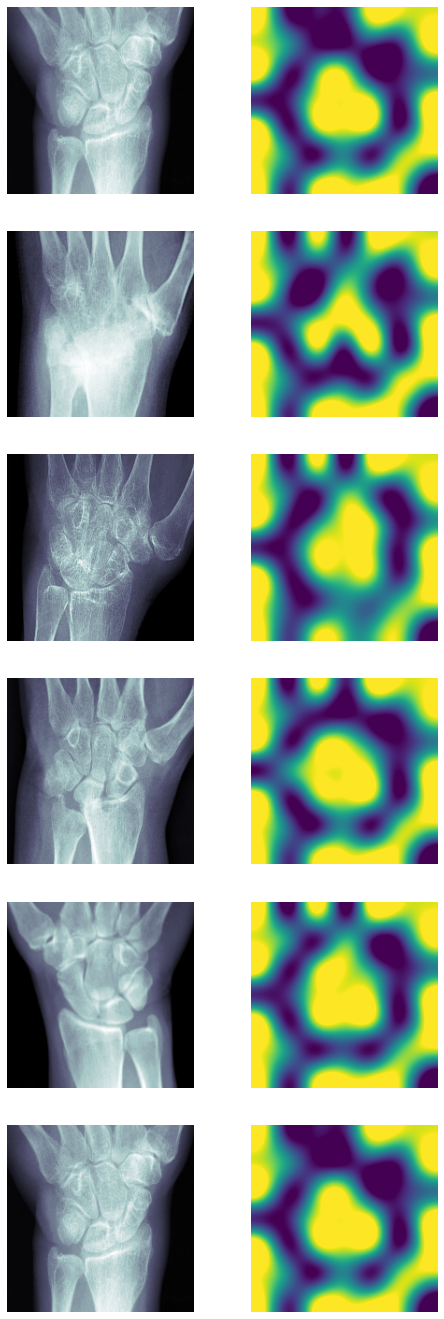

In [ ]:
# get the attention layer since it is the only one with a single output dim
for attn_layer in loaded_model.layers:
    c_shape = attn_layer.get_output_shape_at(0)
    if len(c_shape)==4:
        if c_shape[-1]==1:
            print(attn_layer)
            break

import keras.backend as K
rand_idx = np.random.choice(range(len(img)), size = 6)
attn_func = K.function(inputs = [loaded_model.get_input_at(0), K.learning_phase()],outputs = [attn_layer.get_output_at(0)])

fig, m_axs = plt.subplots(len(rand_idx), 2, figsize = (8, 4*len(rand_idx)))
[c_ax.axis('off') for c_ax in m_axs.flatten()]

for c_idx, (img_ax, attn_ax) in zip(rand_idx, m_axs):
    cur_img = img[c_idx:(c_idx+1)]
    attn_img = attn_func([cur_img, 0])[0]
    img_ax.imshow(cur_img[0,:,:,0], cmap = 'bone')
    attn_ax.imshow(attn_img[0, :, :, 0], cmap = 'viridis', 
                   vmin = 0, vmax = 1, 
                   interpolation = 'lanczos')

In [ ]:
labels = pd.DataFrame(labels)
labels.columns = ['label_' + str(i) for i in range(6)]
labels['overall'] =np.sum(labels[labels.columns], axis = 1)
labels

,label_0,label_1,label_2,label_3,label_4,label_5,overall
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,2.000,2.000,0.000,0.000,0.000,0.000,4.000
2,3.000,0.000,0.000,0.000,3.000,3.000,9.000
3,3.000,2.000,2.000,0.000,2.000,1.000,10.000
4,2.000,2.000,2.000,2.000,2.000,2.000,12.000
5,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,4.000,2.000,0.000,0.000,3.000,3.000,12.000
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
preds = loaded_model.predict(img)
preds = pd.DataFrame(preds)
preds.columns = ['label_' + str(i) for i in range(6)]
preds['overall'] =np.sum(preds[preds.columns], axis = 1)
preds

,label_0,label_1,label_2,label_3,label_4,label_5,overall
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.069,0.000,0.000,0.000,0.000,0.000,0.069
2,3.746,0.000,0.000,0.000,3.517,3.740,11.003
3,2.516,1.587,1.364,0.642,2.645,1.337,10.090
4,0.935,1.615,1.712,2.471,2.094,1.915,10.741
5,0.000,0.000,0.000,0.000,0.007,0.000,0.007
6,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,4.445,3.641,0.000,0.000,3.341,3.494,14.920
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
(preds['overall'] - labels['overall'])

0     1.202
1     2.453
2    -4.449
3     9.388
4     6.292
5     0.000
6    -3.524
7     2.530
8     0.470
9     0.865
10    0.650
11    7.851
12    0.887
13    0.861
14    0.517
15   -1.412
Name: overall, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
compare = pd.concat([labels['overall'], preds['overall']], axis = 1)
compare.columns = ['true', 'preds']
compare['diff'] = compare['true'] - compare['preds']
compare

,true,preds,diff
0,0.000,0.000,0.000
1,5.000,4.427,0.573
2,0.000,0.000,0.000
3,0.000,0.000,0.000
4,4.000,4.168,-0.168
5,2.000,2.146,-0.146
6,20.000,20.044,-0.044
7,0.000,0.000,0.000
8,0.000,0.000,0.000
9,14.000,15.063,-1.063


# Training a wrist narrowing model using efficient B5

In [ ]:
wrist_narrowing_model.fit_generator(generator = train_gen, validation_data = valid_gen, epochs = 300, callbacks = callbacks_list, steps_per_epoch=len(train_ids)//16, 
validation_steps = len(val_ids)//16)

Epoch 1/300
36/36 [==============================] - 366s 10s/step - loss: 1.2766 - mae: 0.5765 - rmse: 0.7596 - val_loss: 1.2283 - val_mae: 0.5559 - val_rmse: 0.6851

Epoch 00001: val_rmse improved from inf to 0.68514, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Wrist models/wrist_narrowing_model_best.h5
Epoch 2/300
36/36 [==============================] - 31s 857ms/step - loss: 1.0147 - mae: 0.4748 - rmse: 0.6540 - val_loss: 0.9736 - val_mae: 0.5308 - val_rmse: 0.6661

Epoch 00002: val_rmse improved from 0.68514 to 0.66613, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Wrist models/wrist_narrowing_model_best.h5
Epoch 3/300
36/36 [==============================] - 30s 824ms/step - loss: 0.8411 - mae: 0.4063 - rmse: 0.5678 - val_loss: 1.1703 - val_mae: 0.5149 - val_rmse: 0.7166

Epoch 00003: val_rmse did not improve from 0.66613
Epoch 4/300
36/36 [==============================] - 30s 823ms/step - loss: 0.7951 - mae: 0.3931 - rmse: 0.5479

KeyboardInterrupt: ignored

# Training effnet with a Keras sequence capability generator

In [ ]:
wrist_model.fit_generator(generator = train_gen, validation_data = valid_gen, epochs = 300, callbacks = callbacks_list, steps_per_epoch=len(train_ids)//16, 
validation_steps = len(val_ids)//16)

Epoch 1/300
36/36 [==============================] - 51s 1s/step - loss: 1.1752 - mae: 0.5582 - rmse: 0.7956 - val_loss: 0.7410 - val_mae: 0.3672 - val_rmse: 0.5987

Epoch 00001: val_rmse improved from inf to 0.59868, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Wrist models/wrist_model_best.h5
Epoch 2/300
36/36 [==============================] - 17s 463ms/step - loss: 0.7621 - mae: 0.4086 - rmse: 0.6297 - val_loss: 0.1589 - val_mae: 0.4301 - val_rmse: 0.6772

Epoch 00002: val_rmse did not improve from 0.59868
Epoch 3/300
36/36 [==============================] - 16s 448ms/step - loss: 0.6754 - mae: 0.3773 - rmse: 0.5797 - val_loss: 1.2721 - val_mae: 0.4260 - val_rmse: 0.6815

Epoch 00003: val_rmse did not improve from 0.59868
Epoch 4/300
36/36 [==============================] - 16s 453ms/step - loss: 0.6302 - mae: 0.3548 - rmse: 0.5597 - val_loss: 0.7000 - val_mae: 0.3516 - val_rmse: 0.5719

Epoch 00004: val_rmse improved from 0.59868 to 0.57188, saving model to

# Effnet B4

In [ ]:
wrist_model.fit_generator(generator = train_gen, validation_data = valid_gen, epochs = 300, steps_per_epoch=len(train_ids)//4, 
                                                  validation_steps = len(val_ids)//4, callbacks = callbacks_list)                             

Epoch 1/300
145/145 [==============================] - 173s 1s/step - loss: 0.8236 - mae: 0.4260 - rmse: 0.6308 - val_loss: 2.3073 - val_mae: 0.4403 - val_rmse: 0.6600

Epoch 00001: val_rmse improved from inf to 0.66000, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Wrist models/wrist_model_best.h5
Epoch 2/300
145/145 [==============================] - 166s 1s/step - loss: 0.5672 - mae: 0.3416 - rmse: 0.5402 - val_loss: 0.2723 - val_mae: 0.3809 - val_rmse: 0.6017

Epoch 00002: val_rmse improved from 0.66000 to 0.60170, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Wrist models/wrist_model_best.h5
Epoch 3/300
145/145 [==============================] - 167s 1s/step - loss: 0.4182 - mae: 0.2799 - rmse: 0.4623 - val_loss: 0.9176 - val_mae: 0.3770 - val_rmse: 0.5948

Epoch 00003: val_rmse improved from 0.60170 to 0.59484, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Wrist models/wrist_model_best.h5
Epoch 4/300
145/145 [==

#Using Effnet B3

In [ ]:
wrist_model.fit_generator(generator = train_gen, validation_data = valid_gen, epochs = 300, steps_per_epoch=len(train_ids)//4, 
                                                  validation_steps = len(val_ids)//4, callbacks = callbacks_list)                             

Epoch 1/300
145/145 [==============================] - 391s 3s/step - loss: 0.5767 - mae: 0.3459 - rmse: 0.5389 - val_loss: 1.4757 - val_mae: 0.3441 - val_rmse: 0.5739

Epoch 00001: val_rmse improved from inf to 0.57390, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Wrist models/wrist_model_best.h5
Epoch 2/300
145/145 [==============================] - 228s 2s/step - loss: 0.2160 - mae: 0.1908 - rmse: 0.3374 - val_loss: 0.3911 - val_mae: 0.2654 - val_rmse: 0.4818

Epoch 00002: val_rmse improved from 0.57390 to 0.48179, saving model to /content/drive/My Drive/RA2/Joint level model/Models/Wrist models/wrist_model_best.h5
Epoch 3/300
145/145 [==============================] - 228s 2s/step - loss: 0.1307 - mae: 0.1391 - rmse: 0.2618 - val_loss: 0.5213 - val_mae: 0.3155 - val_rmse: 0.5312

Epoch 00003: val_rmse did not improve from 0.48179
Epoch 4/300
145/145 [==============================] - 228s 2s/step - loss: 0.0865 - mae: 0.1121 - rmse: 0.2108 - val_loss: 0.7507

KeyboardInterrupt: ignored

In [ ]:
# DL libraries
import keras.backend as K
import tensorflow as tf
from keras.models import load_model

model_weights = '/content/drive/My Drive/RA2/Joint level model/Models/Wrist models/wrist_model_best_val_rmse_0.4723.h5'
def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred -y_true), axis=-1))

depend = {'rmse': rmse}
loaded_model = load_model(model_weights,  custom_objects = depend)

In [ ]:
img, labels = next(RA_image_generator(image_path, val_ids, wrist_labels, augment=False,  batch_size = 32, max_size = 200, min_size = 200))

# Visualizing attention weights 

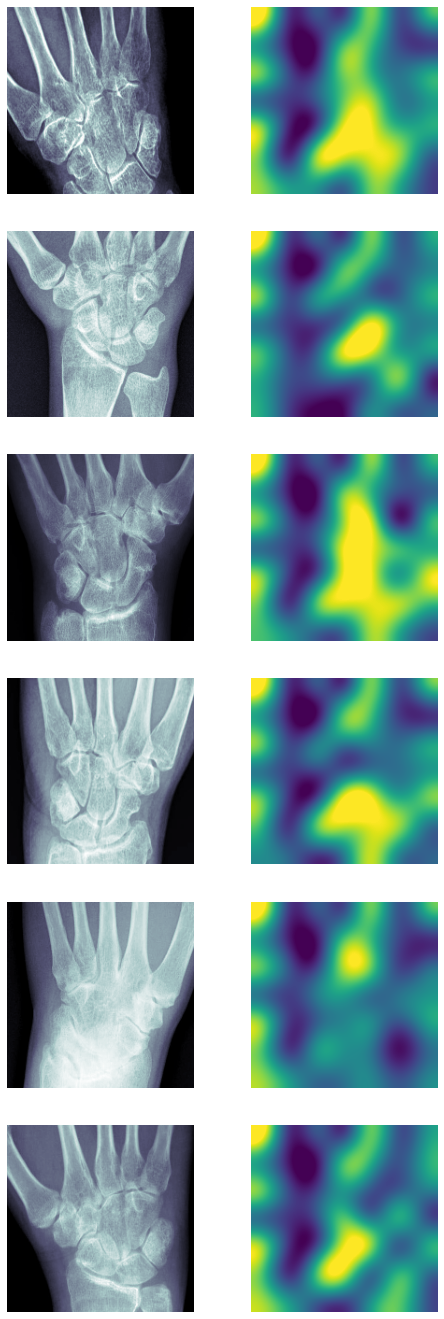

In [ ]:
# get the attention layer since it is the only one with a single output dim
for attn_layer in loaded_model.layers:
    c_shape = attn_layer.get_output_shape_at(0)
    if len(c_shape)==4:
        if c_shape[-1]==1:
            print(attn_layer)
            break

import keras.backend as K
rand_idx = np.random.choice(range(len(img)), size = 6)
attn_func = K.function(inputs = [loaded_model.get_input_at(0), K.learning_phase()],outputs = [attn_layer.get_output_at(0)])

fig, m_axs = plt.subplots(len(rand_idx), 2, figsize = (8, 4*len(rand_idx)))
[c_ax.axis('off') for c_ax in m_axs.flatten()]

for c_idx, (img_ax, attn_ax) in zip(rand_idx, m_axs):
    cur_img = img[c_idx:(c_idx+1)]
    attn_img = attn_func([cur_img, 0])[0]
    img_ax.imshow(cur_img[0,:,:,0], cmap = 'bone')
    attn_ax.imshow(attn_img[0, :, :, 0], cmap = 'viridis', 
                   vmin = 0, vmax = 1, 
                   interpolation = 'lanczos')